# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

In [47]:
#print what information we get with a city
#url='http://api.openweathermap.org/data/2.5/weather?'
#cities="jamestown"
#query_url = f"{url}appid={weather_api_key}&units={units}&q="
#query_url


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
#save base url
url='http://api.openweathermap.org/data/2.5/weather?'
units="imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#create empy lists for the columns in cities.csv
city_name=[]
cloudiness=[]
country=[]
date=[]
humidity=[]
lat=[]
lng=[]
max_temp=[]
wind_speed=[]

#set counter variable
record_count = 0
set_count = 1

# print before looping
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#loop through cities
for city in cities:
    try:
        response = requests.get(query_url + city).json() 
        #city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        
        time.sleep(10)
        
        if record_count > 49:
            record_count = 1
            set_count = set_count + 1
            city_name.append(city)
        else:
            record_count = record_count + 1
            city_name.append(city)
        
        print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
# Not cities in CityPy will be in OpenWeatherMap
    except:
        print("City not found. Skipping...")

# Print at end
print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 | evensk
City not found. Skipping...
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | posse
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | tuatapere
Processing Record 6 of Set 1 | tuktoyaktuk
Processing Record 7 of Set 1 | vostok
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | eyl
Processing Record 11 of Set 1 | gorom-gorom
Processing Record 12 of Set 1 | atuona
Processing Record 13 of Set 1 | westport
Processing Record 14 of Set 1 | qaanaaq
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | cape town
Processing Record 17 of Set 1 | the valley
Processing Record 18 of Set 1 | thompson
Processing Record 19 of Set 1 | monywa
Processing Record 20 of Set 1 | majengo
Processing Record 21 of Set 1 | punta arenas
Processing Record 22 of Set 1 | kavieng
Processing Record 23 of Set 

Processing Record 35 of Set 4 | hofn
Processing Record 36 of Set 4 | vieques
Processing Record 37 of Set 4 | escanaba
City not found. Skipping...
Processing Record 38 of Set 4 | mollendo
Processing Record 39 of Set 4 | qujing
Processing Record 40 of Set 4 | daitari
Processing Record 41 of Set 4 | bambous virieux
Processing Record 42 of Set 4 | praia
Processing Record 43 of Set 4 | altay
Processing Record 44 of Set 4 | santa maria
Processing Record 45 of Set 4 | los algarrobos
Processing Record 46 of Set 4 | alice springs
Processing Record 47 of Set 4 | palana
Processing Record 48 of Set 4 | oranjestad
Processing Record 49 of Set 4 | west bay
Processing Record 50 of Set 4 | hasaki
Processing Record 1 of Set 5 | karratha
Processing Record 2 of Set 5 | mount gambier
Processing Record 3 of Set 5 | urk
Processing Record 4 of Set 5 | biak
Processing Record 5 of Set 5 | rio grande
Processing Record 6 of Set 5 | manacapuru
Processing Record 7 of Set 5 | le passage
Processing Record 8 of Set 5 

Processing Record 24 of Set 8 | itaituba
Processing Record 25 of Set 8 | raudeberg
Processing Record 26 of Set 8 | grindavik
City not found. Skipping...
Processing Record 27 of Set 8 | marfino
Processing Record 28 of Set 8 | port-cartier
Processing Record 29 of Set 8 | lagoa
Processing Record 30 of Set 8 | general pico
Processing Record 31 of Set 8 | mehamn
Processing Record 32 of Set 8 | balabac
Processing Record 33 of Set 8 | turayf
Processing Record 34 of Set 8 | takoradi
Processing Record 35 of Set 8 | jesup
Processing Record 36 of Set 8 | vaitape
City not found. Skipping...
Processing Record 37 of Set 8 | karasburg
Processing Record 38 of Set 8 | yelets
Processing Record 39 of Set 8 | patiya
Processing Record 40 of Set 8 | medea
Processing Record 41 of Set 8 | san patricio
Processing Record 42 of Set 8 | kahului
Processing Record 43 of Set 8 | ashcroft
Processing Record 44 of Set 8 | aykhal
Processing Record 45 of Set 8 | benicarlo
Processing Record 46 of Set 8 | collingwood
Proce

City not found. Skipping...
Processing Record 8 of Set 12 | pahrump
City not found. Skipping...
Processing Record 9 of Set 12 | eureka
Processing Record 10 of Set 12 | oranjemund
Processing Record 11 of Set 12 | muswellbrook
Processing Record 12 of Set 12 | angoche
Processing Record 13 of Set 12 | taft
Processing Record 14 of Set 12 | nuuk
Processing Record 15 of Set 12 | kishi
-------------------------------
Data Retrieval Complete
-------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
#Get a count of each column 
weather_dict = {
    "City":city_name,
    "Cloudiness":cloudiness,
    "Country":country,
    "Date":date,
    "Humidity":humidity,
    "Latitude":lat,
    "Longitude":lng,
    "Max Temp":max_temp,
    "Wind Speed":wind_speed}
weather_df = pd.DataFrame(weather_dict)
weather_df.count()

City          565
Cloudiness    565
Country       565
Date          565
Humidity      565
Latitude      565
Longitude     565
Max Temp      565
Wind Speed    565
dtype: int64

In [10]:
#Export the city data into a .csv and display the DataFrame
weather_df.to_csv('weather_output.csv')
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,evensk,12,RU,1577487799,60,61.92,159.24,0.81,12.91
1,rikitea,90,PF,1577487809,86,-23.12,-134.97,77.47,13.69
2,posse,100,BR,1577487819,77,-14.08,-46.36,73.49,2.91
3,ushuaia,75,AR,1577487684,44,-54.81,-68.31,59.00,14.99
4,tuatapere,49,NZ,1577487839,74,-46.13,167.69,53.01,18.99


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

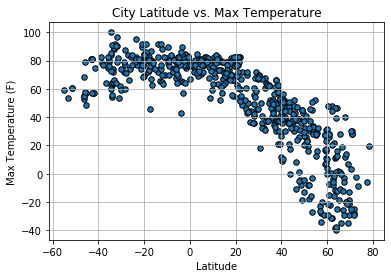

In [11]:
#plot Latitude vs. Temperature with labels and grid
plt.scatter(weather_df["Latitude"], weather_df["Max Temp"], marker="o", edgecolors="black", s=30)
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid()
# Generally, as you get closer to the equator the max temperature increases.

#### Latitude vs. Humidity Plot

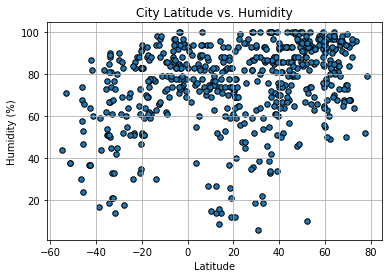

In [12]:
#plot Latitude vs. Humidity with labels and grid
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], marker="o", edgecolors="black", s=30)
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()
# A city's humidity percentage is not related to its latitude location. Most cities humidity percent range from 80 to 100%.

#### Latitude vs. Cloudiness Plot

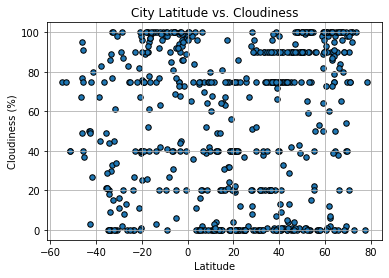

In [13]:
#plot Latitude vs. Cloudiness with labels and grid
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], marker="o", edgecolors="black", s=30)
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()
# A city's cloudiness percentage is not related to its latitude location.

#### Latitude vs. Wind Speed Plot

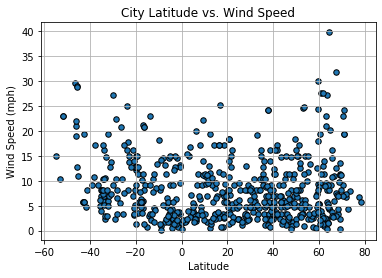

In [14]:
#plot Latitude vs. Wind Speed with labels and grid
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], marker="o", edgecolors="black", s=30)
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()
# A city's wind speed is not related to its latitude location. Most cities wind speed range from 0 to 15 mph.

## Linear Regression

In [21]:
# OPTIONAL: Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, Title, text_coordinates):
    (slope, intercept, r, p, std_err) = stats.linregress(x_values, y_values)
    regress_values = slope * x_values + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    #plot 
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    print(f"R squard: {r**2}")
    plt.show()

In [22]:
# Create Northern and Southern Hemisphere DataFrames
nhem_df = weather_df.loc[weather_df["Latitude"] >= 0,:]
shem_df = weather_df.loc[weather_df["Latitude"] < 0,:]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R squard: 0.7125575102316524


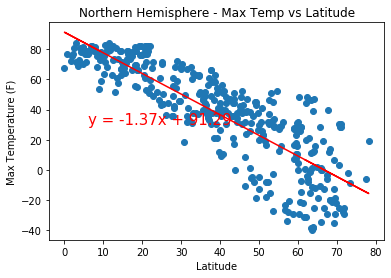

In [34]:
#define x_values and y_values and then apply function
x_values = nhem_df["Latitude"].astype('float')
y_values = nhem_df["Max Temp"].astype('float')

plt.title("Northern Hemisphere - Max Temp vs Latitude")
plt.ylabel("Max Temperature")
plt.xlabel("Latitude")

plot_linear_regression(x_values, y_values, "Northern Hemisphere - Max Temp vs Latitude", (6,30))
plt.show()
# The is a statistically signifant correlation between the latitude locations in the northern hemishpere and the maximum temperature experienced at that latitude location.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R squard: 0.08047379516198494


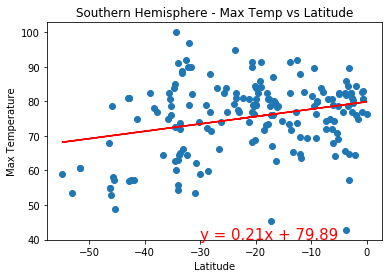

In [36]:
#define x_values and y_values and then apply function
x_values = shem_df["Latitude"].astype('float')
y_values = shem_df["Max Temp"].astype('float')

plt.title("Southern Hemisphere - Max Temp vs Latitude")
plt.ylabel("Max Temperature")
plt.xlabel("Latitude")

plot_linear_regression(x_values, y_values, "Southern Hemisphere - Max Temp vs Latitude", (-30,40))
plt.show()
#According to this data, there is not a significant correlation between latitude location in the southern hemisphere and the maximum temperature. 
#This is opposite for what was found in the norther hemisphere, therefore, before I can make any conclusion, I would run the program again and see if I have the same or different output. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squard: 0.06227023615123472


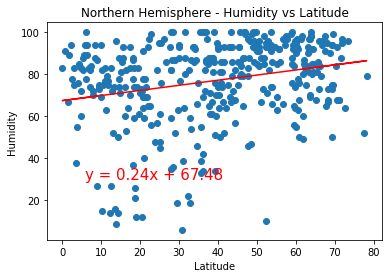

In [37]:
#define x_values and y_values and then apply function
x_values = nhem_df["Latitude"].astype('float')
y_values = nhem_df["Humidity"].astype('float')

plt.title("Northern Hemisphere - Humidity vs Latitude")
plt.ylabel("Humidity")
plt.xlabel("Latitude")

plot_linear_regression(x_values, y_values, "Northern Hemisphere - Humidity vs Latitude", (6,30))
plt.show()
#There is not a correlation between humidity and latitude location in the northern hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squard: 0.2890370552127076


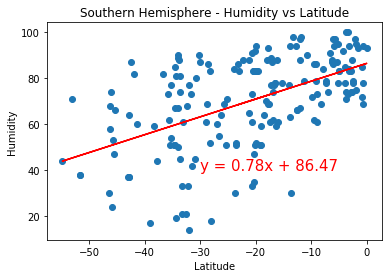

In [38]:
#define x_values and y_values and then apply function
x_values = shem_df["Latitude"].astype('float')
y_values = shem_df["Humidity"].astype('float')

plt.title("Southern Hemisphere - Humidity vs Latitude")
plt.ylabel("Humidity")
plt.xlabel("Latitude")

plot_linear_regression(x_values, y_values, "Southern Hemisphere - Humidity vs Latitude", (-30,40))
plt.show()
#There is not a strong correlation between humidity and latitude location in the southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squard: 0.09148376851742827


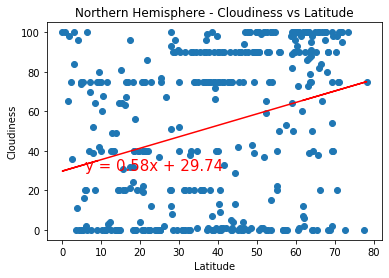

In [39]:
#define x_values and y_values and then apply function
x_values = nhem_df["Latitude"].astype('float')
y_values = nhem_df["Cloudiness"].astype('float')

plt.title("Northern Hemisphere - Cloudiness vs Latitude")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

plot_linear_regression(x_values, y_values, "Northern Hemisphere - Cloudiness vs Latitude", (6,30))
plt.show()
#There is not a correlation between cloudiness and latitude location in the northern hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squard: 0.1156996252144352


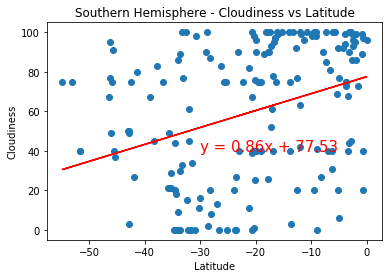

In [40]:
#define x_values and y_values and then apply function

x_values = shem_df["Latitude"].astype('float')
y_values = shem_df["Cloudiness"].astype('float')

plt.title("Southern Hemisphere - Cloudiness vs Latitude")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

plot_linear_regression(x_values, y_values, "Southern Hemisphere - Cloudiness vs Latitude", (-30,40))
plt.show()
#There is not a correlation between cloudiness and latitude location in the southern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squard: 0.017091903553747193


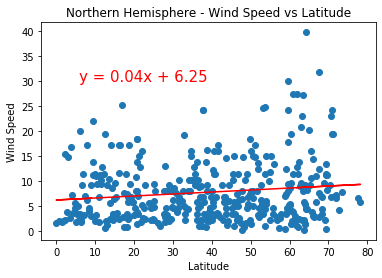

In [41]:
#define x_values and y_values and then apply function
x_values = nhem_df["Latitude"].astype('float')
y_values = nhem_df["Wind Speed"].astype('float')

plt.title("Northern Hemisphere - Wind Speed vs Latitude")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")

plot_linear_regression(x_values, y_values, "Northern Hemisphere - Wind Speed vs Latitude", (6,30))
plt.show()
#There is not a correlation between wind speed and latitude location in the northern hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squard: 0.15323976338455778


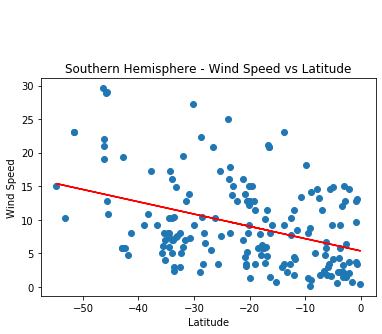

In [42]:
#define x_values and y_values and then apply function
x_values = shem_df["Latitude"].astype('float')
y_values = shem_df["Wind Speed"].astype('float')

plt.title("Southern Hemisphere - Wind Speed vs Latitude")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")

plot_linear_regression(x_values, y_values, "Southern Hemisphere - Wind Speed vs Latitude", (-30,40))
plt.show()
#There is not a correlation between wind speed and latitude location in the southern hemisphere.